# 1. Lets read the data

In [105]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [18]:
df = pd.read_csv("/content/fas_2024.csv")

In [19]:
df= df.dropna()

In [20]:
df.head(1)

,Name,three_pct_season,lwr_paint_pct_oct_nov,upr_paint_pct_oct_nov,mid_pct_oct_nov,three_non_cnr_pct_oct_nov,three_cnr_pct_oct_nov,ft_pct_oct_nov,lwr_paint_shots_oct_nov,upr_paint_shots_oct_nov,mid_shots_oct_nov,three_non_cnr_shots_oct_nov,three_cnr_shots_oct_nov,ft_shots_oct_nov
0,Malcolm Brogdon,0.437,0.484,0.619,0.6,0.444,0.485,0.863,62,21,10,27,33,51


In [95]:
X = df.drop(['Name', 'three_pct_season'], axis=1)
y = df['three_pct_season']

# 2. Understand Data

Based on the graph there are a relatively small number of players with unusually low three-point shooting percentages.

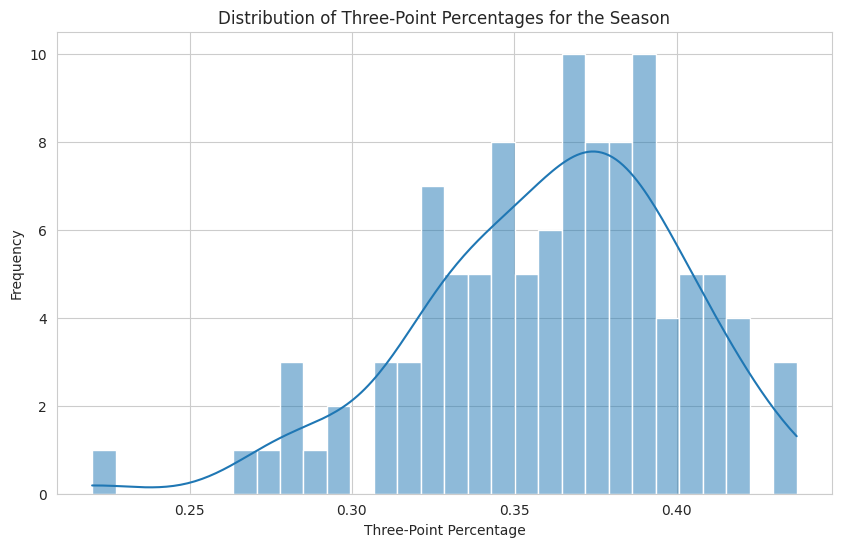

In [49]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['three_pct_season'], kde=True, bins=30)
plt.title('Distribution of Three-Point Percentages for the Season')
plt.xlabel('Three-Point Percentage')
plt.ylabel('Frequency')
plt.show()

# 3. Model Selection

In [96]:
pipeline = Pipeline([('elastic_net_regression', ElasticNet(random_state=42))])

In [97]:
param_grid_interactions = {
    'elastic_net_regression__alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'elastic_net_regression__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [98]:
gscv_interactions = GridSearchCV(pipeline, param_grid_interactions, cv=5, scoring='neg_mean_squared_error')
fitted_elastic_net_interactions = gscv_interactions.fit(X, y)

In [99]:
cv_results = fitted_elastic_net_interactions.cv_results_
model_scores = pd.DataFrame({
'Alpha': cv_results['param_elastic_net_regression__alpha'],
    'L1_Ratio': cv_results['param_elastic_net_regression__l1_ratio'],
    'Mean Test Score': cv_results['mean_test_score']
}).sort_values(by='Mean Test Score', ascending=False)
model_scores.head(5)

,Alpha,L1_Ratio,Mean Test Score
0,0.001,0.1,-0.001648
1,0.001,0.3,-0.001857
2,0.001,0.5,-0.002037
3,0.001,0.7,-0.002207
4,0.001,0.9,-0.002247


In [100]:
best_pipeline = Pipeline([
    ('elastic_net_regression', ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=42))])

In [101]:
best_pipeline.fit(X, y)
predictions = best_pipeline.predict(X)

In [102]:
# Calculating MSE and R²
r2 = r2_score(y, predictions)
print(f'R² Score: {r2}')

R² Score: 0.5034923660809998


In [106]:
df['predicted_three_pct_season'] = predictions

df[['Name', 'three_pct_season', 'predicted_three_pct_season']]

,Name,three_pct_season,predicted_three_pct_season
0,Malcolm Brogdon,0.437,0.416655
1,Tyrese Maxey,0.435,0.371765
2,Stephen Curry,0.432,0.426170
3,Kentavious Caldwell-Pope,0.422,0.395936
4,Jevon Carter,0.421,0.386398
5,Jalen Brunson,0.418,0.364270
6,Michael Porter Jr.,0.416,0.382316
7,Klay Thompson,0.412,0.383755
8,Alec Burks,0.412,0.380157
9,Darius Garland,0.410,0.388712


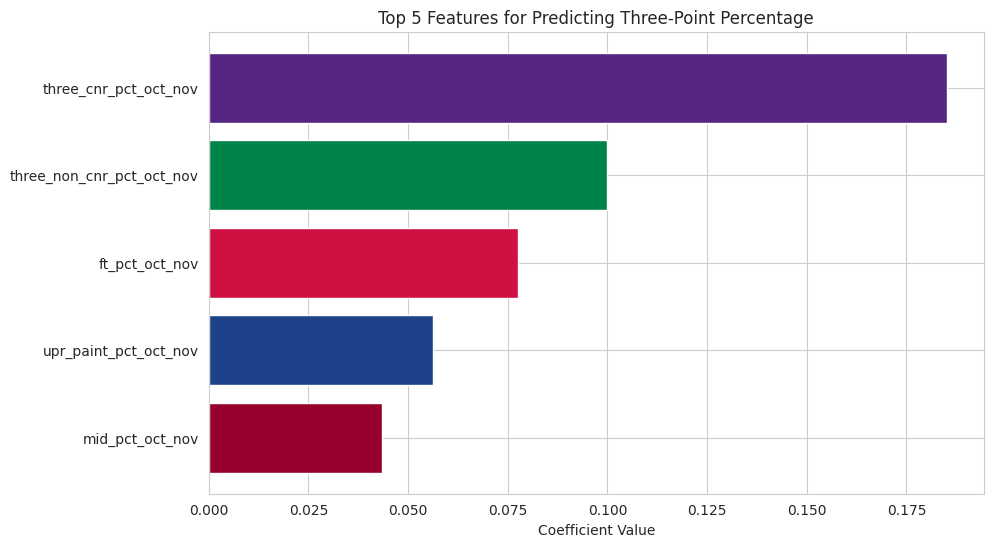

In [113]:
coefficients = best_pipeline.named_steps['elastic_net_regression'].coef_
feature_names = X.columns

colors = {
    '1': '#552583',  # Purple and Gold (Lakers)
    '2': '#008348',  # Green (Celtics)
    '3': '#CE1141',  # Red (Bulls)
    '4': '#1D428A',  # Royal Blue and Gold (Warriors)
    '5': '#98002E',  # Red and Black (Heat)
}

# Sort the coefficients and feature names by absolute value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
top_feature_indices = sorted_indices[:5]

# Get the top 5 feature names and coefficients
top_feature_names = feature_names[top_feature_indices]
top_coefficients = coefficients[top_feature_indices]

# Create a bar chart to visualize the top features
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, top_coefficients, color=[colors[str(i+1)] for i in range(len(top_feature_names))])
plt.xlabel('Coefficient Value')
plt.title('Top 5 Features for Predicting Three-Point Percentage')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()
